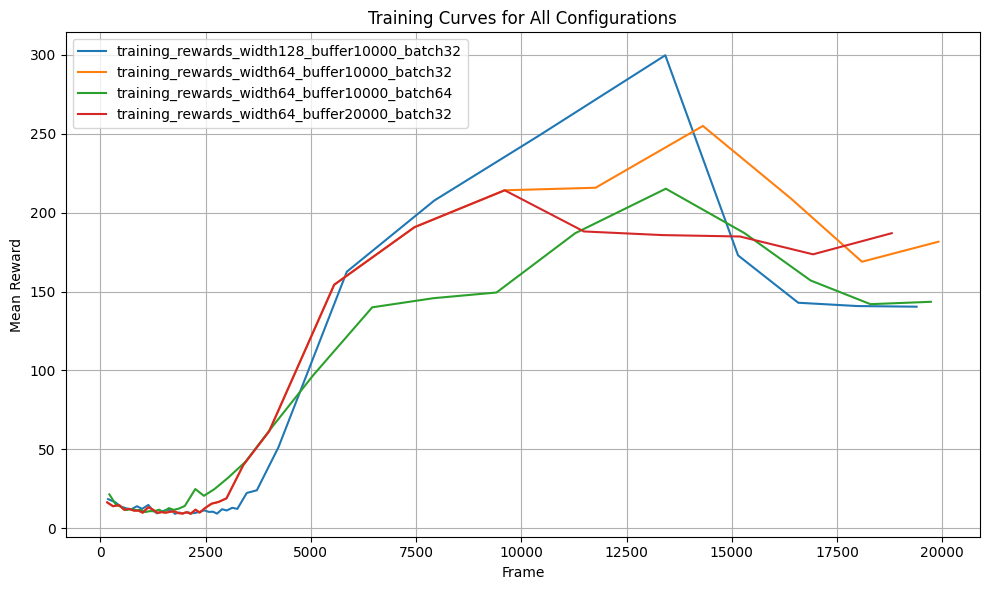

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

plots_dir = os.path.dirname(__file__) if "__file__" in globals() else "./data"
csv_files = glob.glob(os.path.join(plots_dir, "*.csv"))

plt.figure(figsize=(10, 6))
all_curves = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    config_name = os.path.splitext(os.path.basename(csv_file))[0]
    plt.plot(df["frame"], df["avg_reward"], label=config_name)
    all_curves.append((df["frame"], df["avg_reward"], config_name))
    # Singular plots
    plt.figure(figsize=(8, 5))
    plt.plot(df["frame"], df["avg_reward"])
    plt.xlabel("Frame")
    plt.ylabel("Mean Reward")
    plt.title(f"Training Curve: {config_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, f"{config_name}.png"))
    plt.close()

# Combined plot
plt.xlabel("Frame")
plt.ylabel("Mean Reward")
plt.title("Training Curves for All Configurations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "combined_training_curves.png"))
plt.show()